<h1>Aplikasi Prediksi Harga Mobil Bekas Berkategori LMPV/LSUV</h1>

#### Impor dependensi untuk kebutuhan analisis dan pelatihan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Pengumpulan data

In [2]:
cars_data = pd.read_csv('lmpv_dataset.csv')

In [7]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,engine,tax
0,Avanza,2022,238600000,53000,Petrol,Dealer,AT,1500,2024
1,Avanza,2019,140000000,95311,Petrol,Dealer,MT,1300,2024
2,Avanza,2019,180000000,53454,Petrol,Dealer,MT,1500,2024
3,Avanza,2014,112000000,116075,Petrol,Dealer,MT,1300,2023
4,Avanza,2013,99000000,82500,Petrol,Dealer,AT,1300,2024
...,...,...,...,...,...,...,...,...,...
715,Livina,2014,99000000,74292,Petrol,Dealer,AT,1500,2024
716,Livina,2014,108000000,88696,Petrol,Dealer,AT,1500,2025
717,Livina,2014,99000000,74292,Petrol,Dealer,AT,1500,2024
718,Livina,2014,103000000,97041,Petrol,Dealer,AT,1500,2024


In [8]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           720 non-null    object
 1   year           720 non-null    int64 
 2   selling_price  720 non-null    int64 
 3   km_driven      720 non-null    int64 
 4   fuel           720 non-null    object
 5   seller_type    720 non-null    object
 6   transmission   720 non-null    object
 7   engine         720 non-null    int64 
 8   tax            720 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 50.8+ KB


In [9]:
cars_data.shape

(720, 9)

#### Pembersihan data

>pengecekan data null

In [10]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
engine           0
tax              0
dtype: int64

In [11]:
cars_data.dropna(inplace=True)

In [12]:
cars_data.shape

(720, 9)

> pengecekan duplikasi data

In [14]:
cars_data.duplicated().sum()

79

In [15]:
cars_data.drop_duplicates(inplace=True)

In [16]:
cars_data.shape

(641, 9)

In [17]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,engine,tax
0,Avanza,2022,238600000,53000,Petrol,Dealer,AT,1500,2024
1,Avanza,2019,140000000,95311,Petrol,Dealer,MT,1300,2024
2,Avanza,2019,180000000,53454,Petrol,Dealer,MT,1500,2024
3,Avanza,2014,112000000,116075,Petrol,Dealer,MT,1300,2023
4,Avanza,2013,99000000,82500,Petrol,Dealer,AT,1300,2024
...,...,...,...,...,...,...,...,...,...
714,Livina,2019,186000000,18000,Petrol,Dealer,AT,1500,2024
715,Livina,2014,99000000,74292,Petrol,Dealer,AT,1500,2024
716,Livina,2014,108000000,88696,Petrol,Dealer,AT,1500,2025
718,Livina,2014,103000000,97041,Petrol,Dealer,AT,1500,2024


In [18]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641 entries, 0 to 719
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           641 non-null    object
 1   year           641 non-null    int64 
 2   selling_price  641 non-null    int64 
 3   km_driven      641 non-null    int64 
 4   fuel           641 non-null    object
 5   seller_type    641 non-null    object
 6   transmission   641 non-null    object
 7   engine         641 non-null    int64 
 8   tax            641 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 50.1+ KB


#### Eksplorasi data

>Distribusi data

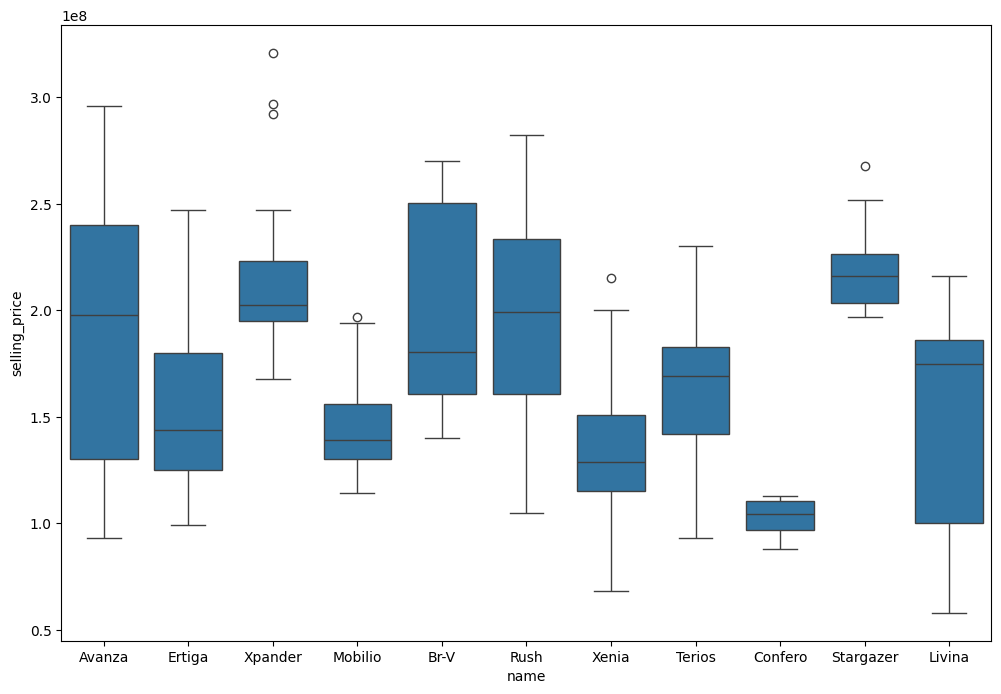

In [19]:
# distribusi harga jual
plt.figure(figsize=(12, 8))
sns.boxplot(x='name',y='selling_price',data=cars_data)
plt.show()

#### Encoding data

In [21]:
# menampilkan semua data unik
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Avanza' 'Ertiga' 'Xpander' 'Mobilio' 'Br-V' 'Rush' 'Xenia' 'Terios'
 'Confero' 'Stargazer' 'Livina']
Unique values of year
[2022 2019 2014 2013 2018 2017 2016 2021 2023 2015 2020 2012 2010 2011
 2005]
Unique values of selling_price
[238600000 140000000 180000000 112000000  99000000 130000000 137000000
 215000000 118000000 157500000 228000000 132000000 222000000 177000000
 208000000 163000000 175000000 113000000 100000000 190000000 188000000
 225000000 210000000 204000000 142000000 178000000 161000000 125000000
 223000000 192000000 234000000 321000000 202000000 168000000 245000000
 211400000 179000000 197000000 232000000 200000000 205000000 183000000
 224000000 297000000 209000000 195000000 217000000 185000000 247000000
 235000000 198000000 292000000 189000000 203000000 207000000 237000000
 116000000 159000000 153000000 156000000 145000000 150000000 115000000
 123000000 131000000 147000000 119000000 138000000 135000000 165000000
 141000000 174000000 151000000 124

In [22]:
# encoding untuk kolom nama mobil

In [23]:
# fungsi untuk nama mobil
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [24]:
# fungsi untuk cleaning nama mobil
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [25]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [26]:
cars_data['name'].unique()

array(['Avanza', 'Ertiga', 'Xpander', 'Mobilio', 'Br-V', 'Rush', 'Xenia',
       'Terios', 'Confero', 'Stargazer', 'Livina'], dtype=object)

In [27]:
# mengubah nama mobil menjadi numerik
cars_data['name'].replace(['Avanza', 'Ertiga', 'Xpander', 'Mobilio', 'Br-V', 'Rush', 'Xenia',
       'Terios', 'Confero', 'Stargazer', 'Livina'],
                          [1,2,3,4,5,6,7,8,9,10,11]
                          ,inplace=True)

In [28]:
# encoding untuk kolom transmisi

In [29]:
cars_data['transmission'].unique()

array(['AT', 'MT'], dtype=object)

In [30]:
cars_data['transmission'].replace(['MT', 'AT'],[1,2], inplace=True)

In [31]:
# encoding untuk kolom tipe seller

In [32]:
cars_data['seller_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [33]:
cars_data['seller_type'].replace(['Dealer', 'Individual'],[1,2], inplace=True)

In [34]:
# encoding untuk kolom bahan bakar

In [35]:
cars_data['fuel'].unique()

array(['Petrol', 'Hybrid'], dtype=object)

In [36]:
cars_data['fuel'].replace(['Petrol', 'Hybrid'],[1,2], inplace=True)

In [37]:
# mengecek informasi tipe data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641 entries, 0 to 719
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           641 non-null    int64
 1   year           641 non-null    int64
 2   selling_price  641 non-null    int64
 3   km_driven      641 non-null    int64
 4   fuel           641 non-null    int64
 5   seller_type    641 non-null    int64
 6   transmission   641 non-null    int64
 7   engine         641 non-null    int64
 8   tax            641 non-null    int64
dtypes: int64(9)
memory usage: 50.1 KB


In [38]:
# reset index
cars_data.reset_index(inplace=True)

In [39]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,engine,tax
0,0,1,2022,238600000,53000,1,1,2,1500,2024
1,1,1,2019,140000000,95311,1,1,1,1300,2024
2,2,1,2019,180000000,53454,1,1,1,1500,2024
3,3,1,2014,112000000,116075,1,1,1,1300,2023
4,4,1,2013,99000000,82500,1,1,2,1300,2024
...,...,...,...,...,...,...,...,...,...,...
636,714,11,2019,186000000,18000,1,1,2,1500,2024
637,715,11,2014,99000000,74292,1,1,2,1500,2024
638,716,11,2014,108000000,88696,1,1,2,1500,2025
639,718,11,2014,103000000,97041,1,1,2,1500,2024


In [40]:
cars_data.drop(columns=['index'], inplace=True)

In [41]:
# menampilkan kembali semua data unik
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11]
------------
year
[2022 2019 2014 2013 2018 2017 2016 2021 2023 2015 2020 2012 2010 2011
 2005]
------------
selling_price
[238600000 140000000 180000000 112000000  99000000 130000000 137000000
 215000000 118000000 157500000 228000000 132000000 222000000 177000000
 208000000 163000000 175000000 113000000 100000000 190000000 188000000
 225000000 210000000 204000000 142000000 178000000 161000000 125000000
 223000000 192000000 234000000 321000000 202000000 168000000 245000000
 211400000 179000000 197000000 232000000 200000000 205000000 183000000
 224000000 297000000 209000000 195000000 217000000 185000000 247000000
 235000000 198000000 292000000 189000000 203000000 207000000 237000000
 116000000 159000000 153000000 156000000 145000000 150000000 115000000
 123000000 131000000 147000000 119000000 138000000 135000000 165000000
 141000000 174000000 151000000 124000000 139000000 158000000 134000000
 121000000 114000000 117000000 148000000 16

#### Analisis data hasil encoding

<Axes: >

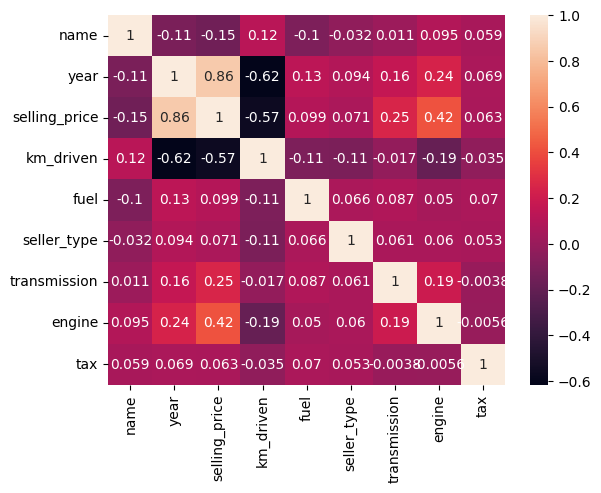

In [46]:
# menganalisis korelasi antar data
sns.heatmap(cars_data.corr(), annot=True,)

#### Splitting data

In [47]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=1)

#### Pemilihan model

In [74]:
model = LinearRegression()

#### Training model

In [75]:
model.fit(x_train, y_train)

LinearRegression()

#### Evaluasi model

In [76]:
predict = model.predict(x_test)

In [77]:
predict

array([1.13821199e+08, 2.34563920e+08, 9.12229157e+07, 2.39778357e+08,
       1.94666130e+08, 2.35078416e+08, 1.50711977e+08, 1.71829670e+08,
       1.49965138e+08, 2.33964608e+08, 1.53806711e+08, 1.62102217e+08,
       1.65699367e+08, 1.25047506e+08, 1.25538091e+08, 1.68641264e+08,
       1.90467553e+08, 1.49542496e+08, 1.41790487e+08, 2.09721815e+08,
       2.07477601e+08, 5.80029523e+07, 1.30967185e+08, 2.28421038e+08,
       1.54757187e+08, 1.66185475e+08, 1.93337995e+08, 2.09122503e+08,
       1.81985914e+08, 1.96582987e+08, 1.78920543e+08, 1.65459830e+08,
       2.34056242e+08, 1.19817589e+08, 1.19218276e+08, 2.34015567e+08,
       1.82054777e+08, 2.43294752e+08, 1.57893939e+08, 1.72566202e+08,
       1.37383054e+08, 1.91066865e+08, 1.06900557e+08, 2.34842322e+08,
       1.03185222e+08, 1.43781562e+08, 1.84231828e+08, 2.05337867e+08,
       1.79219589e+08, 1.55036891e+08, 1.84509560e+08, 1.12627773e+08,
       2.28206504e+08, 1.66896912e+08, 1.77447238e+08, 2.07514006e+08,
      

In [80]:
# mencari nilai R squared error
error_score = metrics.r2_score(y_test, predict)
print("R squared error : ", error_score)

R squared error :  0.8524751581108289


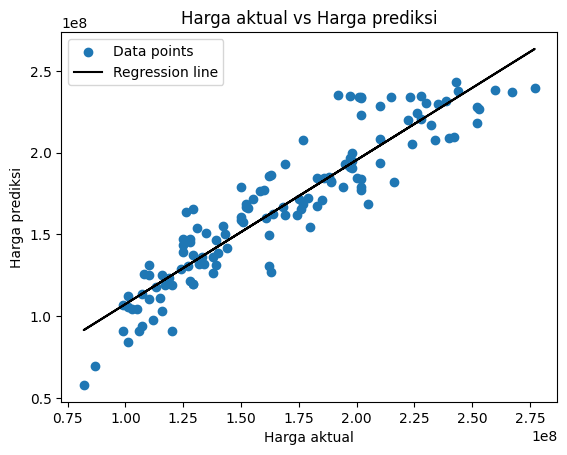

In [82]:
# visualisasi harga aktual vs harga prediksi
plt.scatter(y_test, predict, label='Data points')

m, b = np.polyfit(y_test, predict, 1)
plt.plot(y_test, m*y_test + b, color='black', label='Regression line')

plt.xlabel("Harga aktual")
plt.ylabel("Harga prediksi")
plt.title("Harga aktual vs Harga prediksi")
plt.legend()

plt.show()

In [83]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,engine,tax
620,11,2019,96000,1,1,2,1500,2024


In [84]:
input_data_model = pd.DataFrame(
    [[11,2019,96000,1,1,2,1500,2024]],
    columns=['name','year','km_driven','fuel','seller_type','transmission', 'engine', 'tax'])

In [85]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,engine,tax
0,11,2019,96000,1,1,2,1500,2024


In [86]:
model.predict(input_data_model)

array([1.78966649e+08])

#### Impor dependensi Pickle untuk serialisasi objek

In [87]:
import pickle as pk

In [88]:
pk.dump(model,open('model.pkl','wb'))